### Курс "Python для исследователя", осень 2020

### Занятие 4, библиотека Numpy

# Numpy

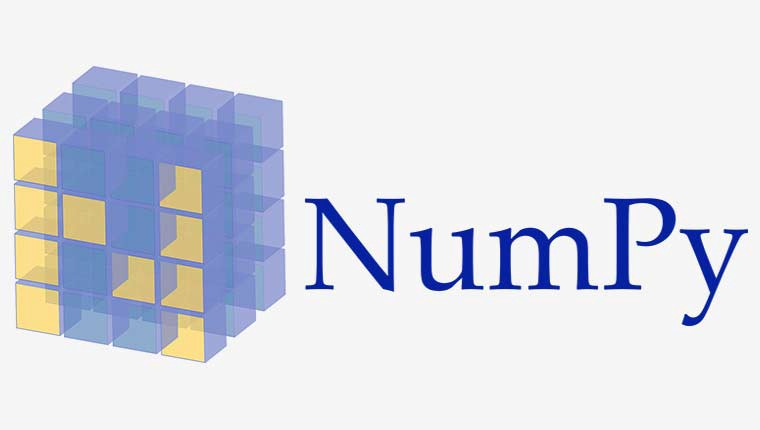

In [1]:
from IPython.display import Image
Image(filename='Python04-Numpy_extra/numpy.jpeg') 

**Numpy** - это главная библиотека для научных расчетов в Python. В целом, очень похожа на **MatLab**. Ее основа - многомерные массивы, а также набор функций для удобной работы с ними.

*Замечание*. В данной презентации будут изложены наиболее важные и необходимые моменты, детальную информацию по библиотеке можно получить, сверившись с официальной [документацией](https://numpy.org/doc/stable/).

### Зачем нужно максимально стараться все математические расчеты делать в NumPy?

* Предположим модельную задачу: у нас есть два списка a и b одинаковой длины n, и мы хотим посчитать сумму $R = \sum_{i=0}^{n-1}(a_{i}^2+b_{i}^3)$

Сравним по скорости варианты выполнения через обычные списки и подход с помощью Numpy. Детали об используемых функциях будут расскажены дальше, здесь - просто мотивационный пример.

In [2]:
import numpy as np # импорт numpy

a_np = np.random.random(1000) # два случайных вектора длины n=1000
b_np = np.random.random(1000)
a_list = a_np.tolist() # переводим их в списки для чистоты эксперимента
b_list = b_np.tolist()

# списочная функция
def fun_list(a_list, b_list):
    res = 0
    for i in range(len(a_list)):
        a1 = a_list[i]
        b1 = b_list[i]
        res += a1*a1 + b1*b1*b1
    return res

# numpy-функция
def fun_np(a_np, b_np):
    res = np.sum(a_np**2 + b_np**3)
    return res

ret_list = fun_list(a_list, b_list)
ret_np = fun_np(a_np, b_np)
print(f'list result = {ret_list}, np result = {ret_np}') # ответы - одинаковые

list result = 582.6657822273083, np result = 582.6657822273077


А теперь сравним по времени эти два подхода (сделаем 1000 замеров):

In [3]:
from timeit import timeit

t_list = timeit('fun_list(a_list, b_list)', globals=globals(), number=1000)
print(f'List time: {t_list}')
t_np = timeit('fun_np(a_np, b_np)', globals=globals(), number=1000)
print(f'Numpy time: {t_np}')

List time: 0.27374319999999996
Numpy time: 0.060870599999999886


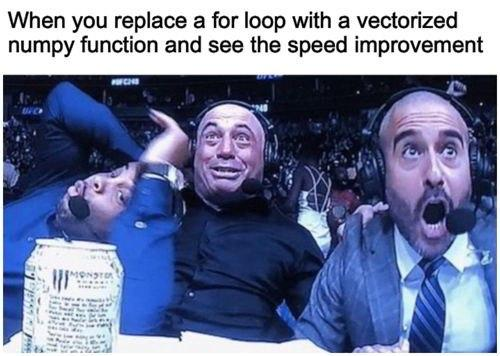

In [4]:
Image(filename='Python04-Numpy_extra/numpy_speed.jpg') 

### Создание массивов из списков и стандартные массивы

* Главный конструктор: `np.array`

In [5]:
a = np.array([1, 2, 3]) # создание одномерного массива из плоского списка
b = np.array([[1.5, 2, 3], [4, 5, 6]]) # создание двухмерного массива 2x3 из списка списков
c = np.array([[[1.5, 2, 3], [4, 5, 6]], [[3, 2, 1], [4, 5, 6]]], dtype=np.float32) # Массив
# создание трехмерного массива 2x2x3 (3 - внутренняя размерность) и явное задание типа массива

print(f'1D: {a}\n2D: {b}\n3D: {c}')

1D: [1 2 3]
2D: [[1.5 2.  3. ]
 [4.  5.  6. ]]
3D: [[[1.5 2.  3. ]
  [4.  5.  6. ]]

 [[3.  2.  1. ]
  [4.  5.  6. ]]]


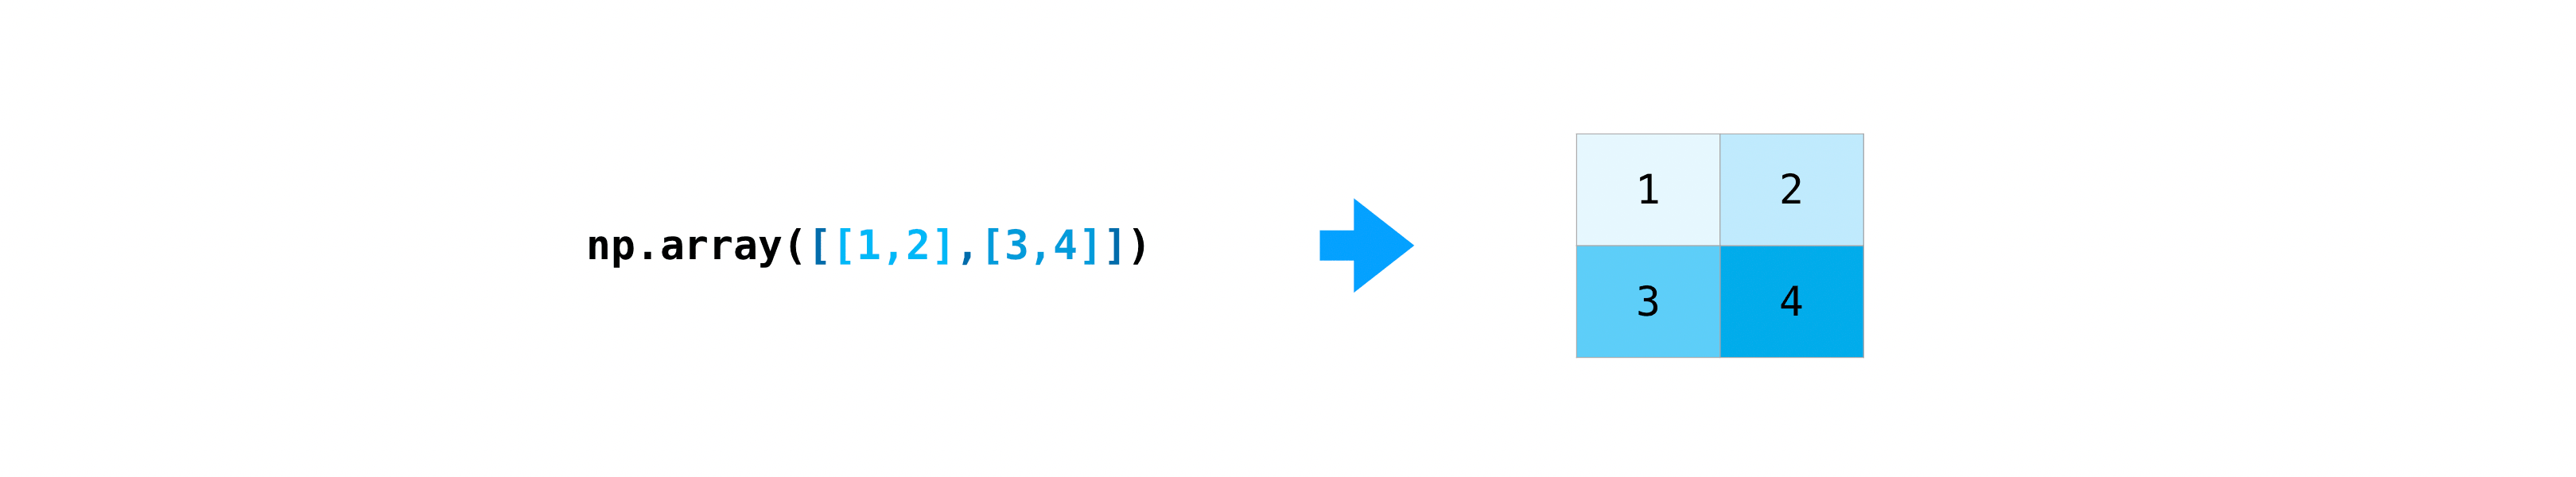

In [6]:
Image(filename='Python04-Numpy_extra/np_create_matrix.png') 

* Можно определять нулевые `zeros()`, единичные `ones`/`eye` и пустые `empty` массивы (которые можно затем заполнить с помощью метода `fill`)
* Также можно задавать массивы, которые являются арифметической прогрессией с помощью `arange` или `linspace`


**Внимание**: размерность (если больше 1) задается кортежом, а не просто через запятую!

In [7]:
x = np.zeros((3, 4)) # нулевой массив размера 3x4
y = np.ones((2, 3, 4), dtype=np.int64) # трехмерный массив из единиц
v = np.eye(3, 4) # матрица с единицей на главной диагонали
u = np.empty([1,2]) # пустой вектор - заполняется тем, что уже было в ячейках памяти. Очень быстрая функция
print(f'Zeros = {x}\nOnes = {y}\nIdentity = {v}\nEmpty = {u}')
u.fill(2)
print(f'Empty filled = {u}')
xa = np.arange(4) # аналог range
xl = np.linspace(0, 5, 5) # делим отрезок на n-1 равных частей
print(f'x_arange = {xa}\nx_linspace = {xl}')

Zeros = [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Ones = [[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]
Identity = [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
Empty = [[ 4.42478588e+030 -1.42737783e-149]]
Empty filled = [[2. 2.]]
x_arange = [0 1 2 3]
x_linspace = [0.   1.25 2.5  3.75 5.  ]


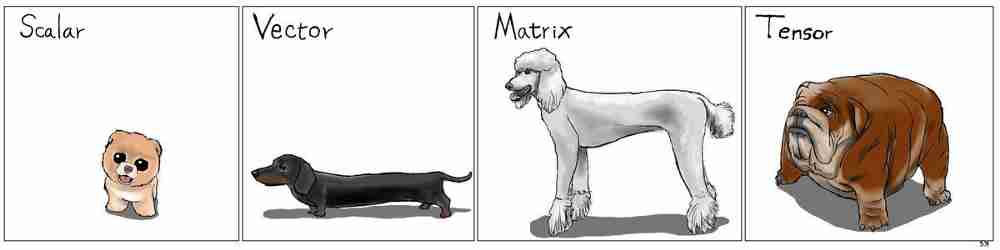

In [8]:
Image(filename='Python04-Numpy_extra/scalar_vector_matrix_tensor.jpeg') 

* Преобразовать обратно в Python-список можно с помощью функции `tolist`

In [9]:
print(f'a = {v}, type = {type(v)}')
v_list = v.tolist()
print(f'a_list = {v_list}, type = {type(v_list)}')

a = [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]], type = <class 'numpy.ndarray'>
a_list = [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0]], type = <class 'list'>


* Преобразование типа: `astype`

In [10]:
a_f = np.array([1, 2, 3.5], dtype=np.float32)
a_i = a_f.astype(np.int32)
print(f'a = {a_f}, type = {a_f.dtype}')
print(f'a.astype(int32) = {a_i}, type = {a_i.dtype}')

a = [1.  2.  3.5], type = float32
a.astype(int32) = [1 2 3], type = int32


### Метрики размера массива
* В Numpy существует целый ряд характеристик размера массива
    * `.shape`: количество элементов по каждой из размерностей
    * `len()`: количество элементов в первой ("внешней") размерности
    * `.ndim`: размерность
    * `.size`: полное количество элементов (объем)
    
Обратите внимание, что все, кроме `len()` - поля (не методы)!

In [11]:
print(f'c = {c}')
print(f"Shape = {c.shape}, Length = {len(c)}, NDim = {c.ndim}, Size = {c.size}")

c = [[[1.5 2.  3. ]
  [4.  5.  6. ]]

 [[3.  2.  1. ]
  [4.  5.  6. ]]]
Shape = (2, 2, 3), Length = 2, NDim = 3, Size = 12


### Операции над массивами (линейная алгебра и геометрия)
* Поэлементные арифметические операции выполняются с помощью переопределенных операторов `+ - * /`

* Операции со **скалярным** операндом: операнд копируется во все ячейки матрицы ровно того же размера, что и матричный операнд, после чего происходит поэлементное действие

In [12]:
print(f'a = {a}')
print(f'a*3 = {a*3}')

a = [1 2 3]
a*3 = [3 6 9]


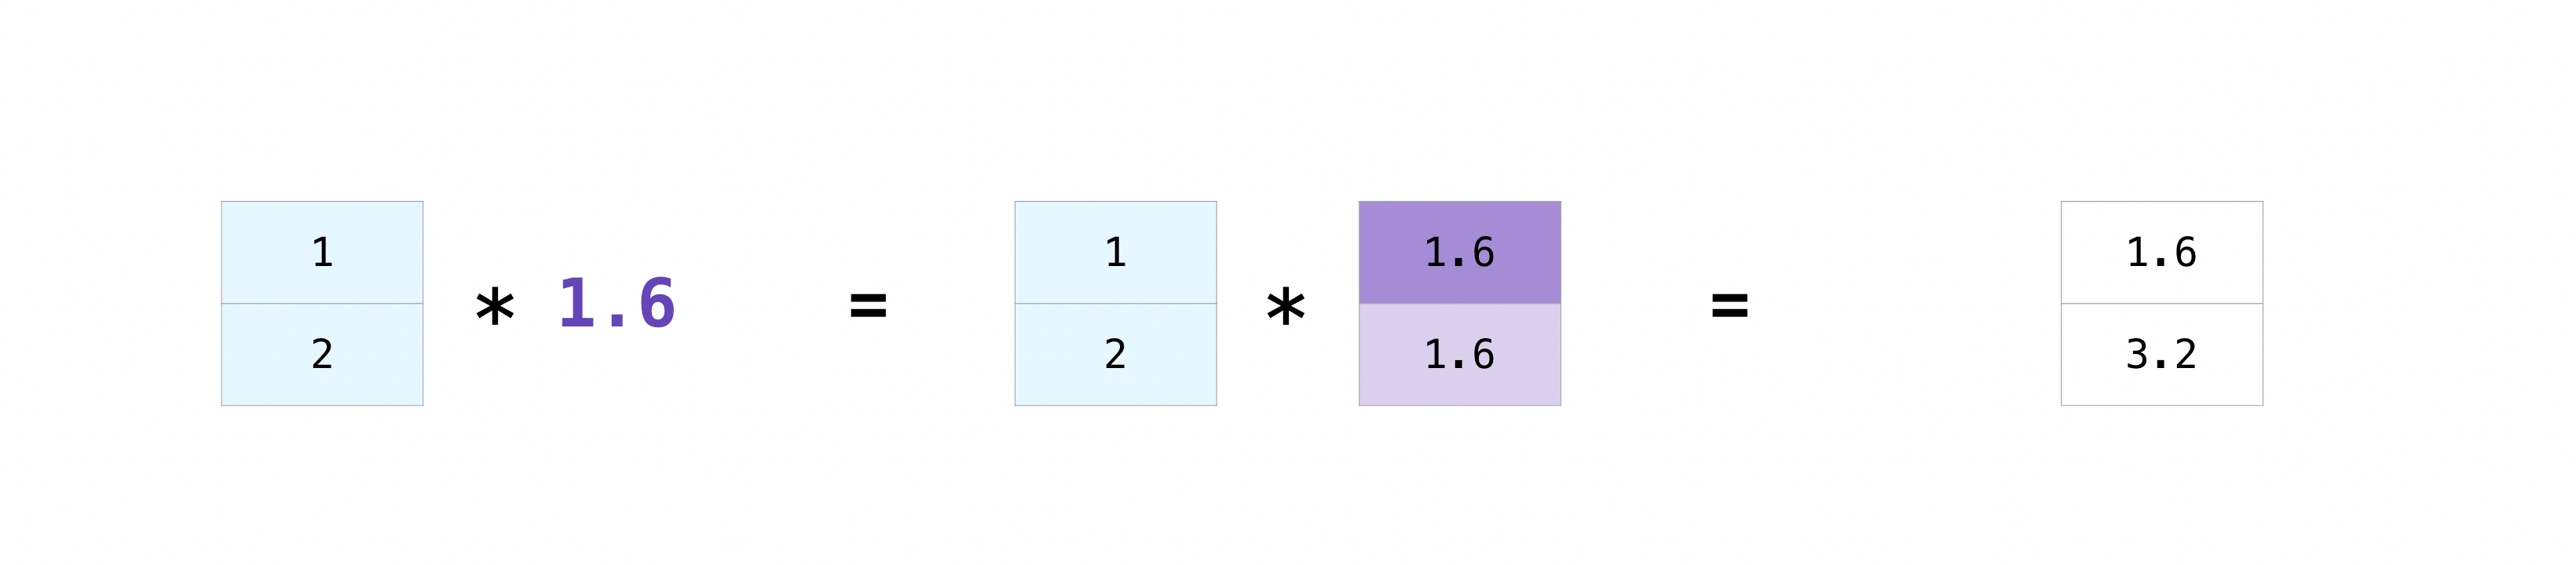

In [13]:
Image(filename='Python04-Numpy_extra/np_multiply_broadcasting.png')

* Операции с **матричными** операндами: оба должны иметь одинаковые размерности (кроме случая *броадкастинга* - см. далее)

In [14]:
a1 = np.array([[1, 2], [3, 4]])
a2 = np.array([[5, 6], [7, 8]])
a12 = a1 + a2
print(f'a1 = {a1}, shape={a1.shape}\na2 = {a2}, shape={a2.shape}')
print(f'a1 + a2 = {a12}, shape={a12.shape}')

a1 = [[1 2]
 [3 4]], shape=(2, 2)
a2 = [[5 6]
 [7 8]], shape=(2, 2)
a1 + a2 = [[ 6  8]
 [10 12]], shape=(2, 2)


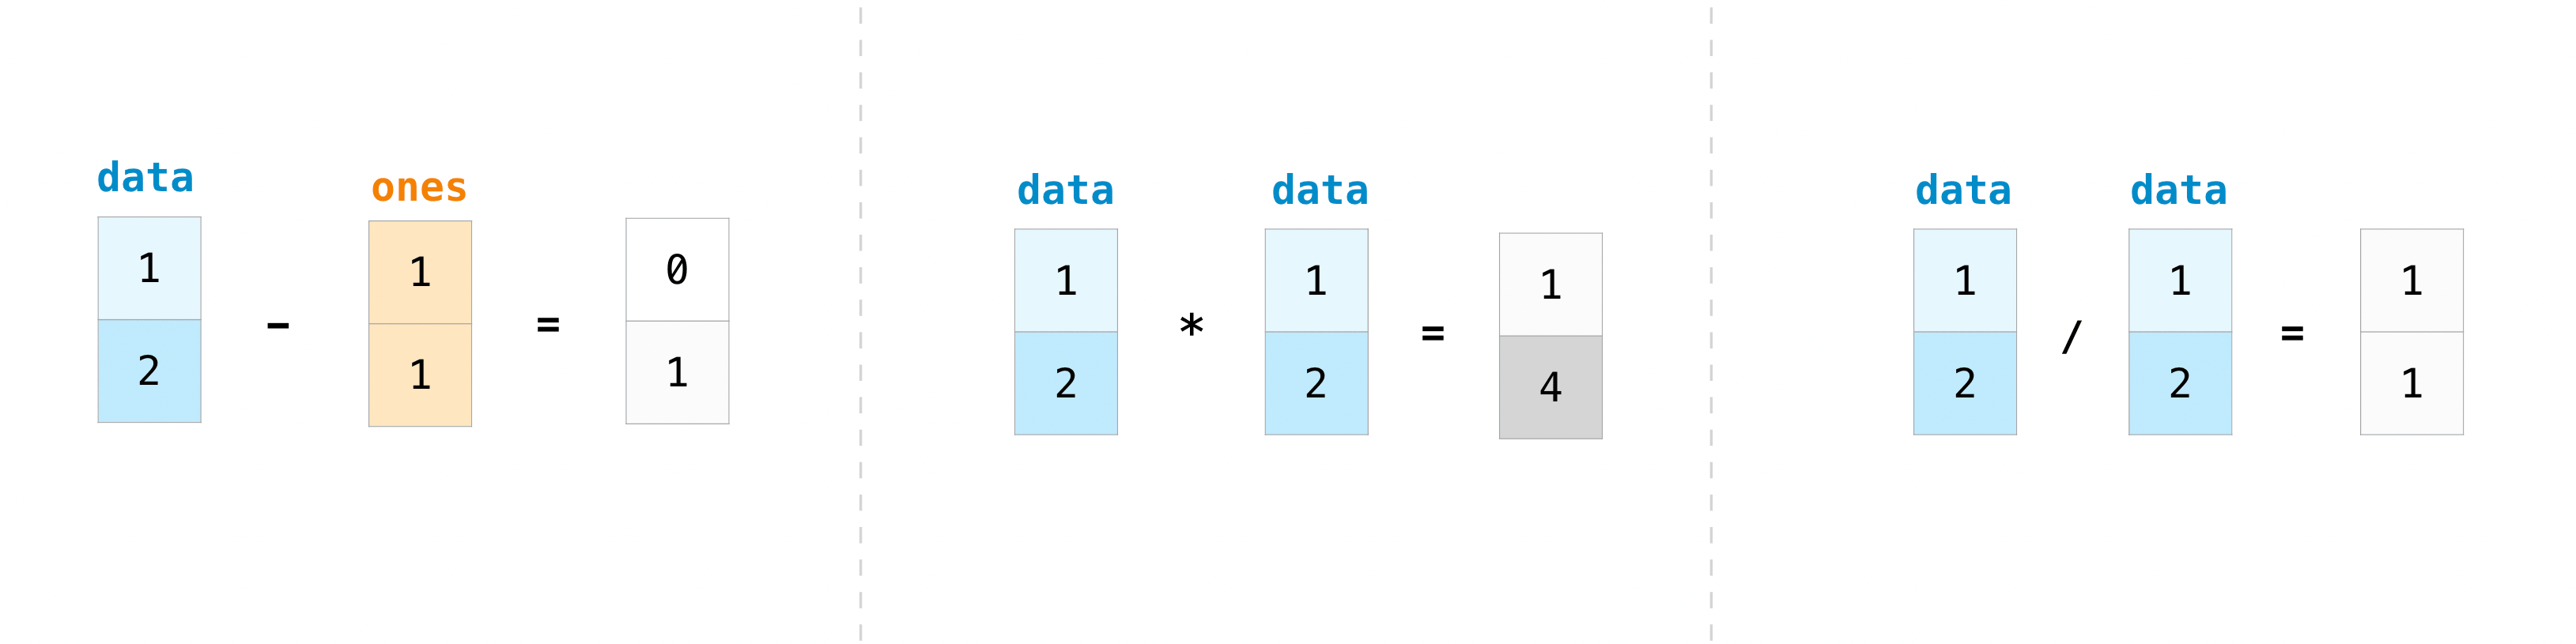

In [15]:
Image(filename='Python04-Numpy_extra/np_sub_mult_divide.png')

* Главная матричная операция - умножение, выполняется с помощью функции `matmul` либо `@`

In [16]:
x = np.ones((3)) # вектор размера 3
A = np.ones((2, 3)) # матрица размера 2x3
Ax = np.matmul(A, x) # результат - вектор размера 2
Ax2 = A @ x
print(f'A = {A}\nx = {x}\nA*x (matmul) = {Ax}, A*x (@) = {Ax2}')

A = [[1. 1. 1.]
 [1. 1. 1.]]
x = [1. 1. 1.]
A*x (matmul) = [3. 3.], A*x (@) = [3. 3.]


* Скалярное произведение двух векторов: `dot`

In [17]:
a1 = np.array([1, 2, 3])
a2 = np.array([3, 2, 1])
a12 = np.dot(a1, a2)
print(f'a1 = {a1}, a2 = {a2}, (a1, a2) = {a12}')

a1 = [1 2 3], a2 = [3 2 1], (a1, a2) = 10


* Также часто применяется транспонирование матрицы: `.T`

In [18]:
print(f'b = {b}')
print(f'b.T = {b.T}') # транспонируем

b = [[1.5 2.  3. ]
 [4.  5.  6. ]]
b.T = [[1.5 4. ]
 [2.  5. ]
 [3.  6. ]]


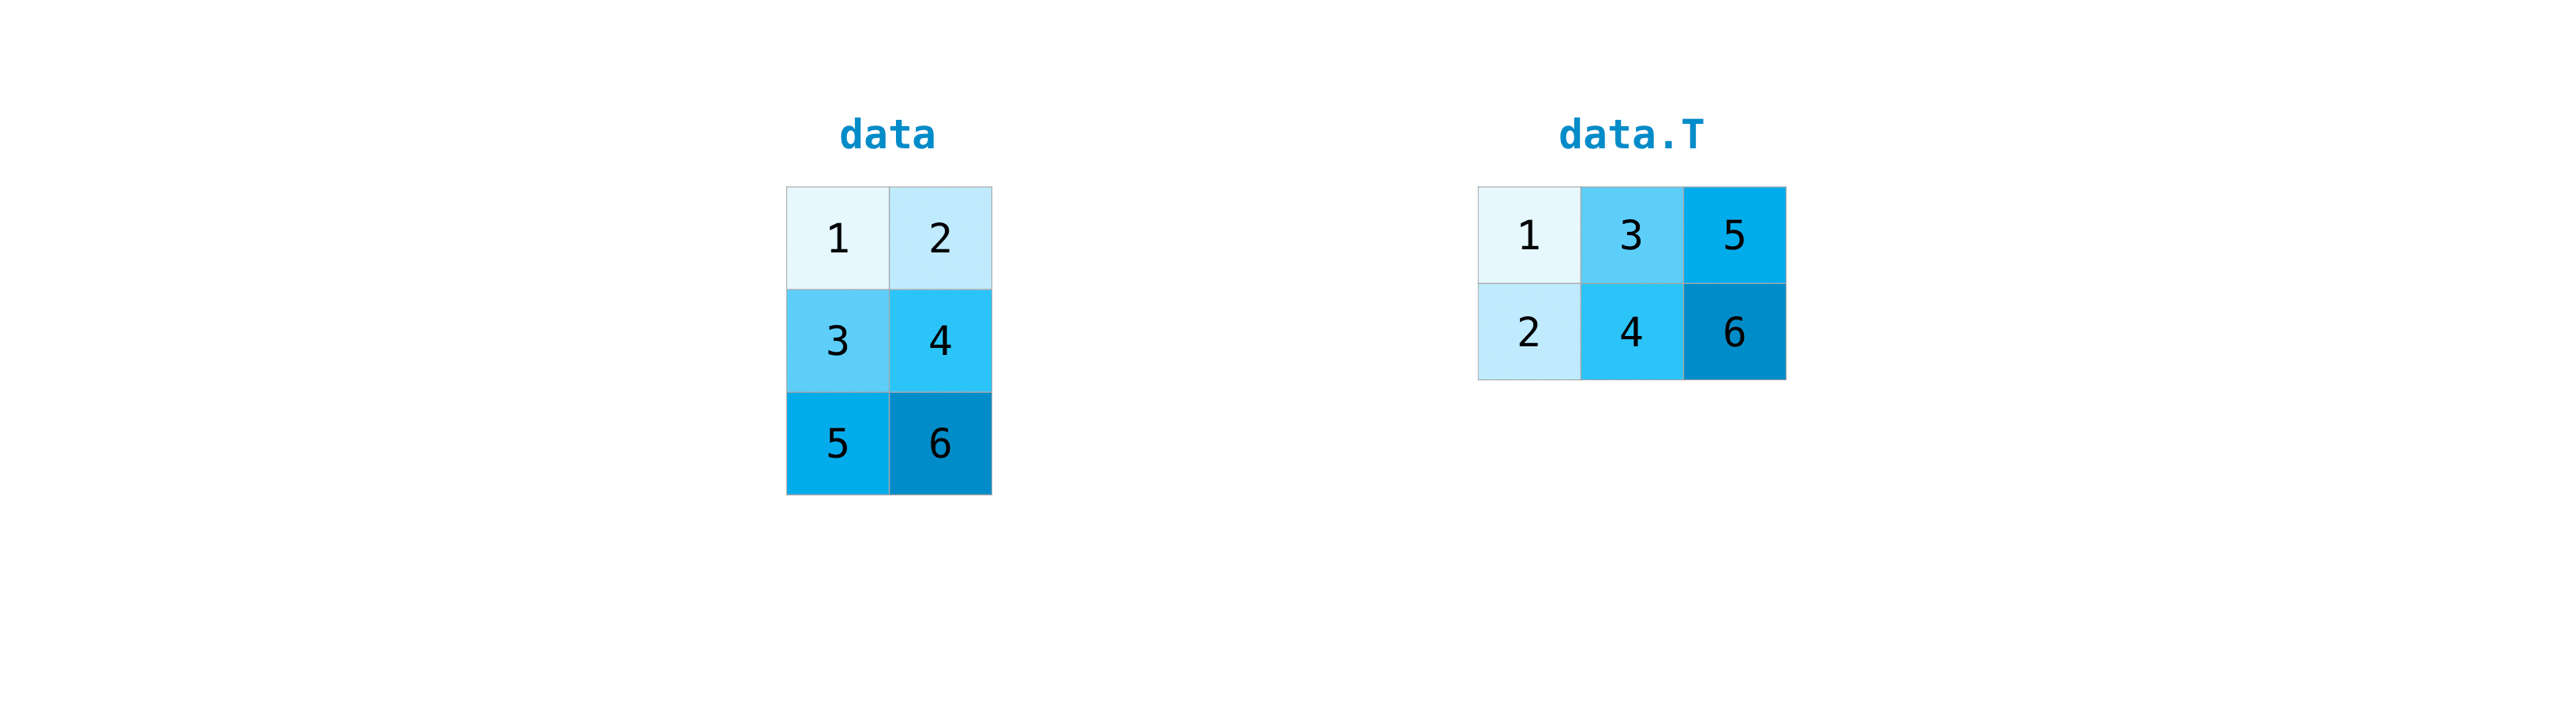

In [19]:
Image(filename='Python04-Numpy_extra/np_transposing_reshaping.png')

* Обращение матрицы происходит с помощью функции `linalg.inv()`
* А детерминант - с помощью `linalg.det()`

In [20]:
matr = np.array([[1, 2], [3, 4]])
matr_inv = np.linalg.inv(matr)
matr_det = np.linalg.det(matr)
print(f'A = {matr}')
print(f'A^(-1) = {matr_inv}')
print(f'det(A) = {matr_det}')
print(f'A * A^(-1) = {np.matmul(matr, matr_inv)}')

A = [[1 2]
 [3 4]]
A^(-1) = [[-2.   1. ]
 [ 1.5 -0.5]]
det(A) = -2.0000000000000004
A * A^(-1) = [[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


* А систему линейных уравнений можно решить с помощью `linalg.solve()`

In [21]:
svob = np.array([1, 1])
x = np.linalg.solve(matr, svob)
print(f'A*x = b\nA = {matr}\nb = {svob}\n=> x = {x}')
print(f'Check: A*x = {np.matmul(matr, x)} = b = {svob}')

A*x = b
A = [[1 2]
 [3 4]]
b = [1 1]
=> x = [-1.  1.]
Check: A*x = [1. 1.] = b = [1 1]


* Можно использовать тригонометрические функции (например, `sin`, `cos`) и разные константы (например, `np.pi`)
* То же самое и со степенными (`exp`, `log`) и константами (`np.e`)

In [22]:
pi = np.pi
e = np.e
print(f'pi = {pi}, sin(pi) = {np.sin(pi)}, cos(pi) = {np.cos(pi)}')
print(f'e = {e}, exp(1) = {np.exp(1)}, log(e) = {np.log(e)}')

pi = 3.141592653589793, sin(pi) = 1.2246467991473532e-16, cos(pi) = -1.0
e = 2.718281828459045, exp(1) = 2.718281828459045, log(e) = 1.0


* Векторное произведение (вектор, перпендикулярный двум исходным) с помощью `cross`

In [23]:
a1 = np.array([1,0,0])
a2 = np.array([0,0,1])
a_cross = np.cross(a1, a2)
print(f'a1 = {a1}, a2 = {a2}, cross = {a_cross}')

a1 = [1 0 0], a2 = [0 0 1], cross = [ 0 -1  0]


* Декартово (внешнее) произведение векторов размерности (m,) и (n,) - это матрица (m,n). Делается с помощью `outer`

In [24]:
a1 = np.array([1,2])
a2 = np.array([3,4,5])
a_outer = np.outer(a1, a2)
print(f'a1 = {a1}, shape={a1.shape}, a2 = {a2}, shape={a2.shape}')
print(f'outer = {a_outer}, shape={a_outer.shape}')

a1 = [1 2], shape=(2,), a2 = [3 4 5], shape=(3,)
outer = [[ 3  4  5]
 [ 6  8 10]], shape=(2, 3)


### Broadcasting (бродкастинг)
1. Если размерность `ndim` массивов не совпадает, то все недостающие внешние (первые) размерности меньшего массива становятся равными 1
2. Если соответствующие размерности `shape` массивов не совпадают, но при этом в одном массиве это значение равно 1, то оно увеличивается до размерности второго простым копированием значений в этой размерности
    * В противном случае будет ошибка `ValueError: operands could not be broadcast together` 

In [25]:
a = np.array([1, 2, 3]) # shape = 3
b = np.array([[1.5, 2, 3], [4, 5, 6]]) # shape = (2,3)
b1 = np.array([[1.5, 2], [4, 5]]) # shape = (2,2)

print(f'a = {a}\na.shape = {a.shape}')
print(f'b = {b}\nb.shape = {b.shape}')
print(f'b1 = {b1}\nb1.shape = {b1.shape}')

a = [1 2 3]
a.shape = (3,)
b = [[1.5 2.  3. ]
 [4.  5.  6. ]]
b.shape = (2, 3)
b1 = [[1.5 2. ]
 [4.  5. ]]
b1.shape = (2, 2)


При арифметической операции `a+b` мы имеем: `a` размерности 3, `b` размерности 2x3. Дополняем внешние размерности для `a`: 1x3. Теперь по первой размерности у `a` имеем 1, а у `b` - 3. Теперь копированием "раздуваем" массив `a` до размерности 2x3. И уже теперь выполняем поэлементное сложение.

In [26]:
ab = a + b # После "бродкаста" складываем a по очереди с первой и второй строкой b
print(f'a + b = {ab}') 

a + b = [[2.5 4.  6. ]
 [5.  7.  9. ]]


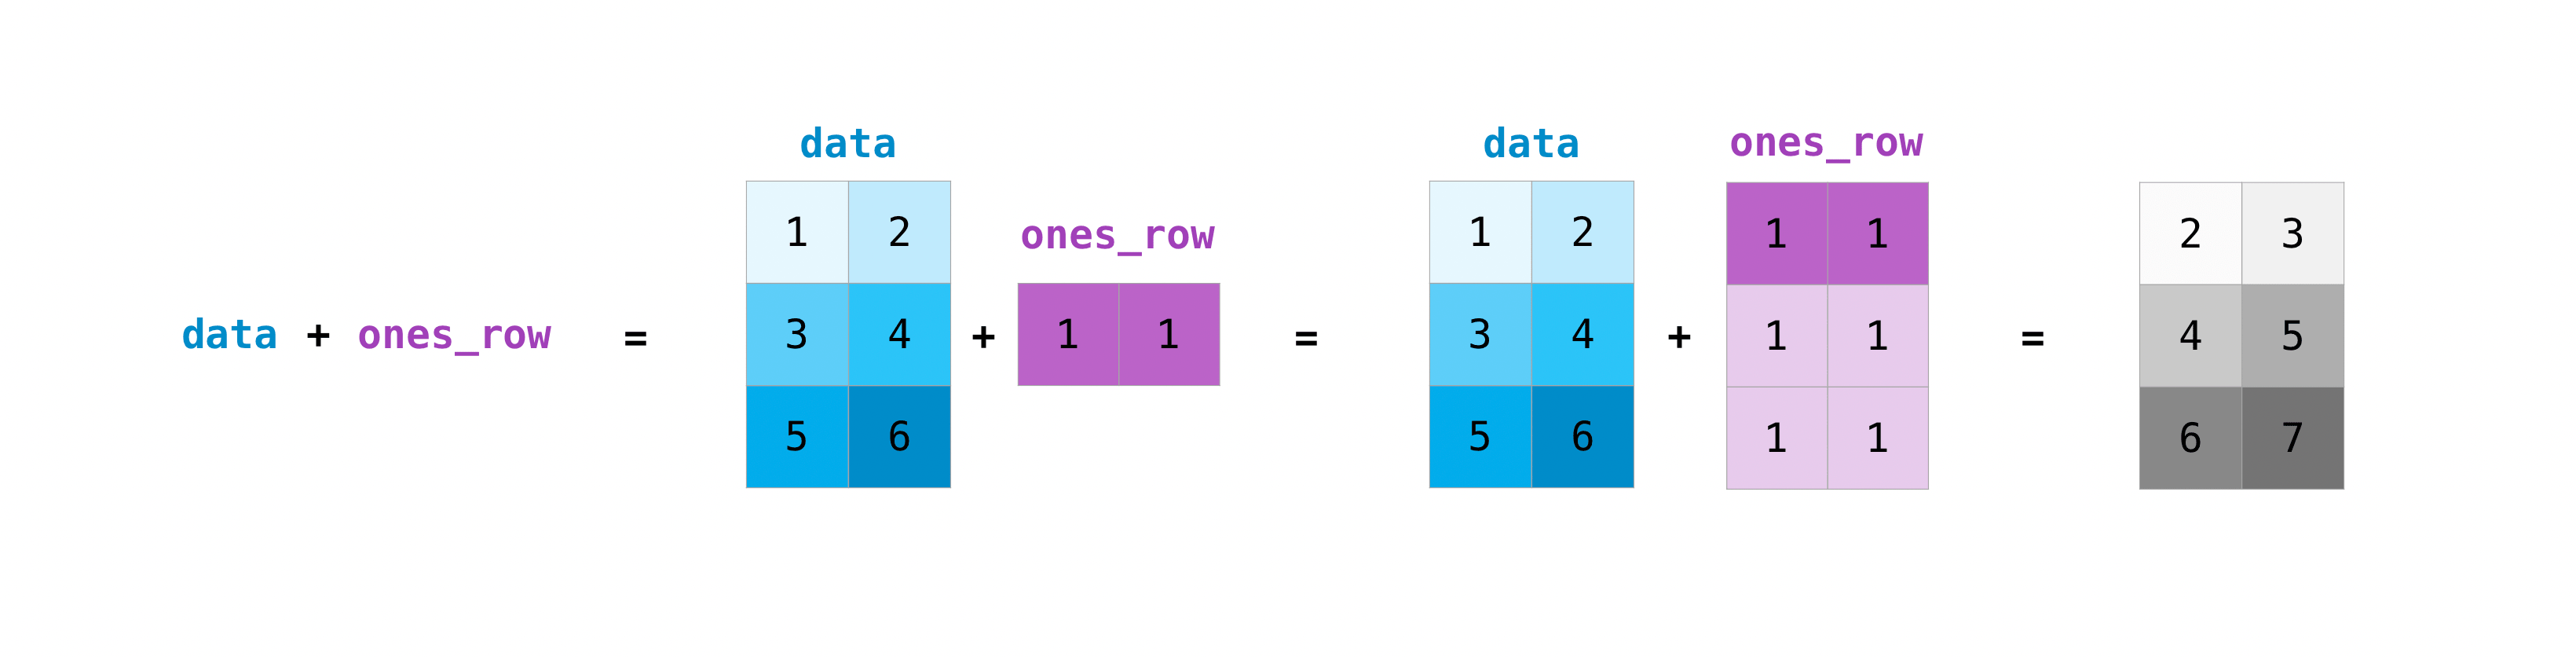

In [27]:
Image(filename='Python04-Numpy_extra/np_matrix_broadcasting.png')

In [28]:
ab1 = a + b1

ValueError: operands could not be broadcast together with shapes (3,) (2,2) 

### Индексация и срезы

* К элементу `(i1, i2,...,in)` `n`-мерного массива `a` можно обратиться тремя способами:
    * `a[i1][i2]...[in]`
    * `a[i1, i2,...,in]`
    * `a[(i1, i2,...,in)]`
* Если массив имеет размерность `n`, а при его вызове указывается только `k < n` координат, то результатом будет `(n-k)`-мерный массив
  * `0`-мерный массив - это точка (единственное значение)
* Указание символа `:` вместо координаты  означает "взять все элементы в этой размерности"
  * Так же, как и с обычными списками, можно указывать диапазон при срезе: `n1:n2:step` (а если `::-step`, `step`>0, то будем идти в обратном направлении)
* Указание символа `...` вместо координаты  означает "заменить все остальные координаты на `:`"

In [29]:
print(f'b = {b}')
# Возвращаем единственный элемент
print(f'b[1][2] = {b[1][2]}')
print(f'b[1, 2] = {b[1, 2]}')
print(f'b[(1, 2)] = {b[(1, 2)]}')
# Возвращаем массив 
print(f'b[0] = {b[0]}')
print(f'b[-1] = {b[-1]}') # Последний элемент по первой размерности
print(f'b[:, 1] = {b[:, 1]}') # Срез
print(f'b[0, ::-2] = {b[0, ::-2]}') # Срез

print(f'c = {c}')
print(f'c[...,2] = {c[...,2]}')

b = [[1.5 2.  3. ]
 [4.  5.  6. ]]
b[1][2] = 6.0
b[1, 2] = 6.0
b[(1, 2)] = 6.0
b[0] = [1.5 2.  3. ]
b[-1] = [4. 5. 6.]
b[:, 1] = [2. 5.]
b[0, ::-2] = [3.  1.5]
c = [[[1.5 2.  3. ]
  [4.  5.  6. ]]

 [[3.  2.  1. ]
  [4.  5.  6. ]]]
c[...,2] = [[3. 6.]
 [1. 6.]]


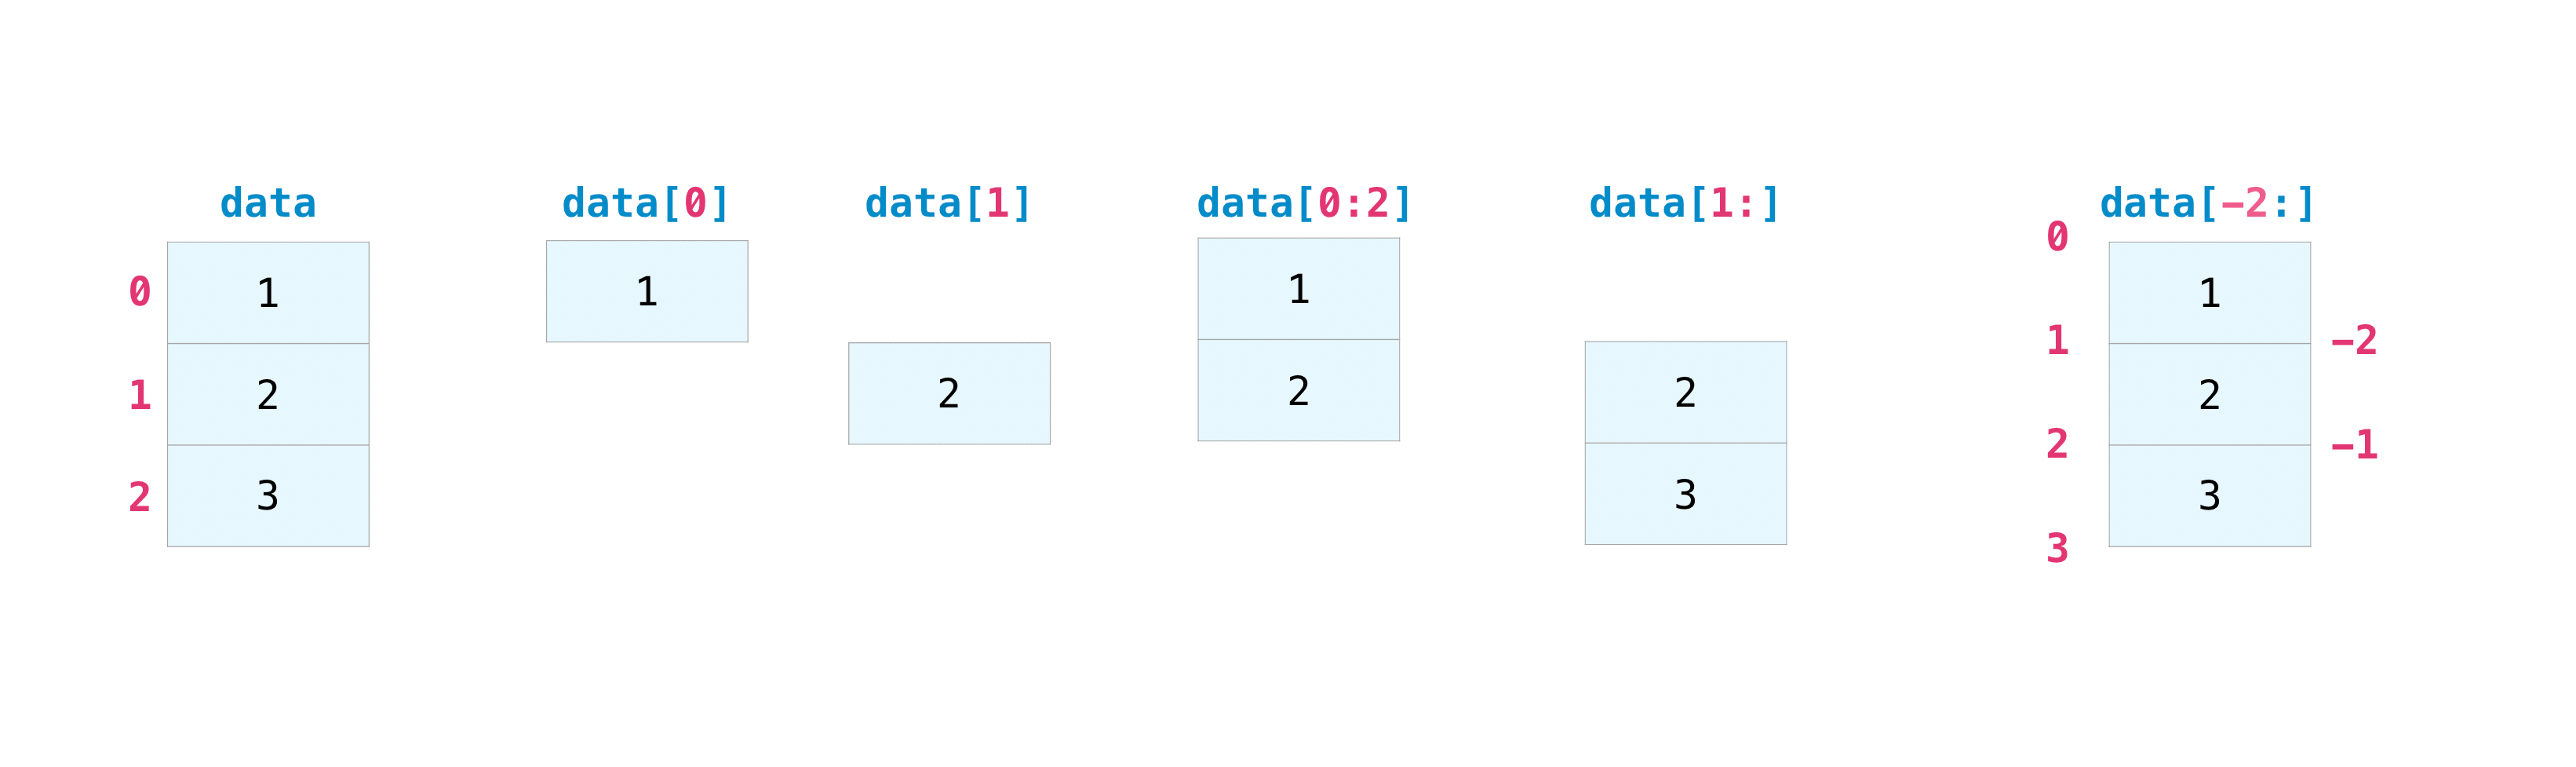

In [30]:
Image(filename='Python04-Numpy_extra/np_indexing.png')

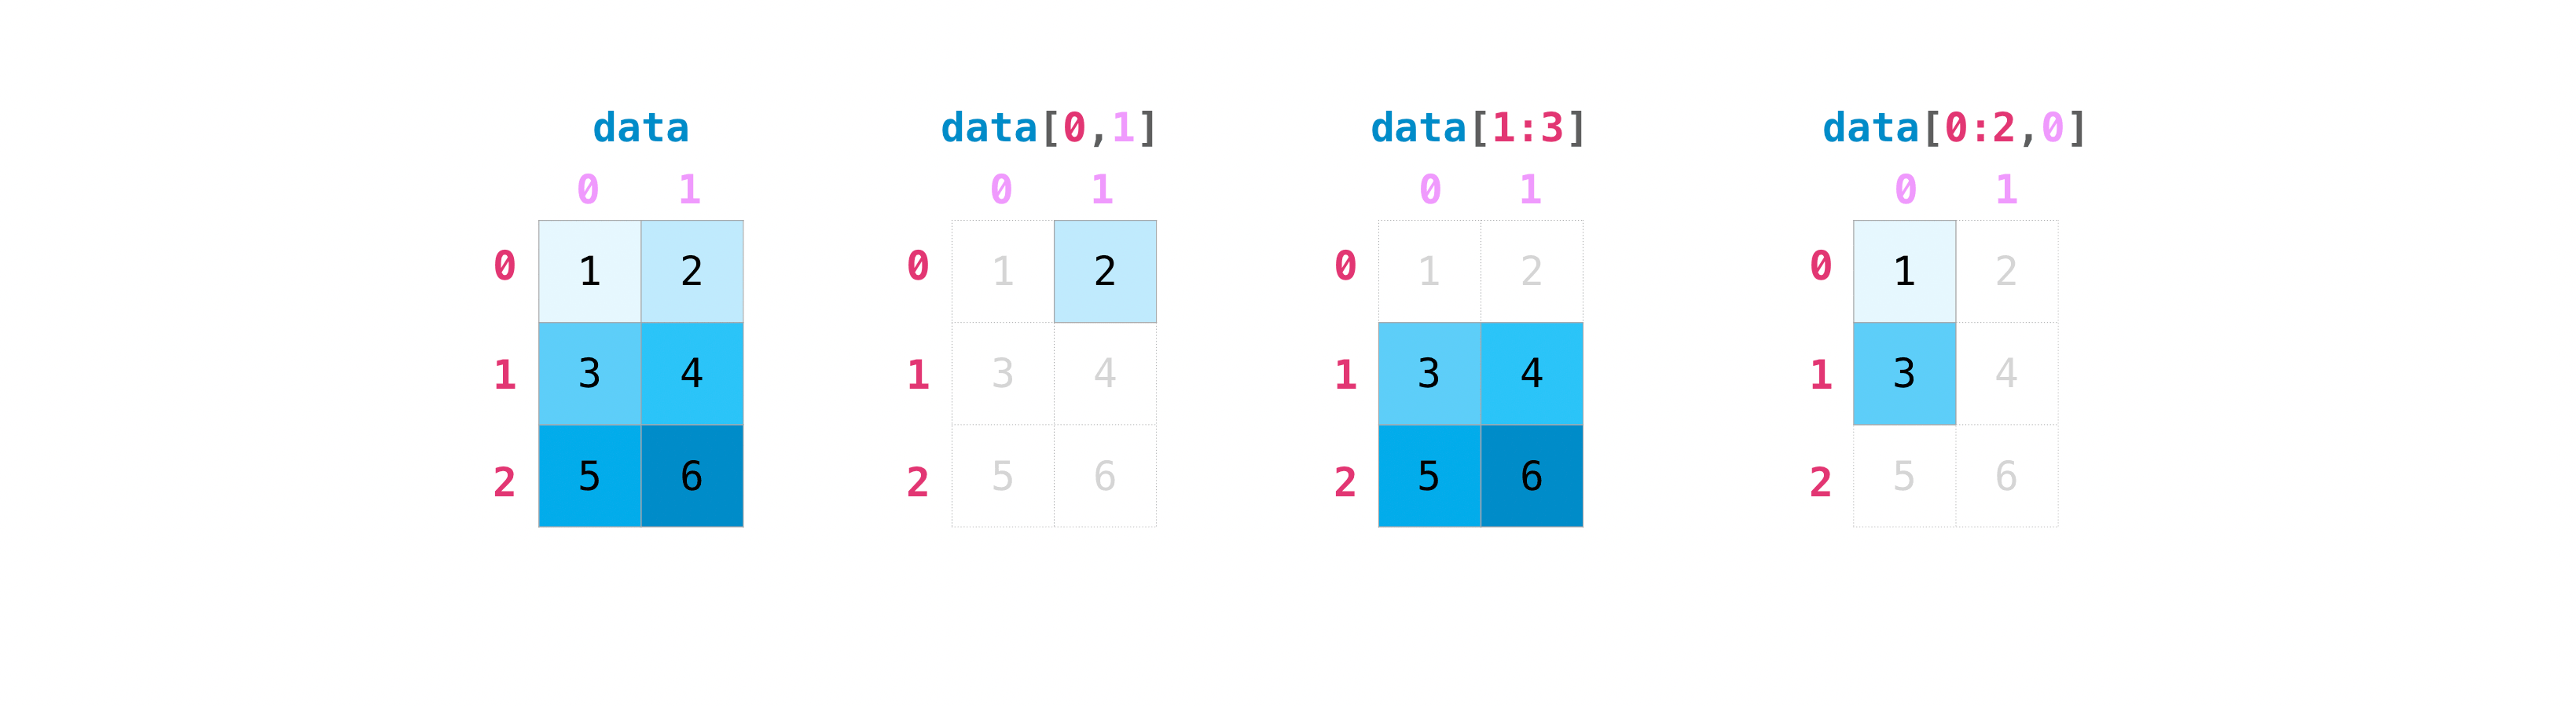

In [31]:
Image(filename='Python04-Numpy_extra/np_matrix_indexing.png')

* Логическая индексация: `a[a_bool]`, где `a_bool` - массив типа `bool` такого же `shape`, как и `a`. На выходе будет одномерный массив тех элементов `a`, соответствующие координаты которых в `a_bool` заняты `True`
* Списковая индексация: `b[x, y]`, где `x, y` - обычные списки одинаковой длины `n`, означает одномерный массив `c = [b[x[0], y[0]], b[x[1], y[1]], ..., b[x[n-1], y[n-1]]]`

In [32]:
print(f'b = {b}')
print(f'b[b > 2] = {b[b >2]}')
x = [1, 0]
y = [1, 2]
print(f'x = {x}, y = {y}, b[x, y] = {b[x, y]}')

b = [[1.5 2.  3. ]
 [4.  5.  6. ]]
b[b > 2] = [3. 4. 5. 6.]
x = [1, 0], y = [1, 2], b[x, y] = [5. 3.]


### О преобразовании размерностей

* Все вектора по умолчанию имеют размерность 1, то есть их shape=(n,). Они не являются ни вектор-столбцами shape=(1,n), ни вектор-строками shape=(n,1), поскольку это уже матрицы.

* Часто при матричных операциях вектора сами преобразуются в нужный формат (1,n) или (n,1) - см. раздел *Броадкастинг*, но иногда это нужно сделать специально с помощью функции `reshape` (которая может поменять размерность для любых входных массивов).

In [33]:
a = np.array([1, 2, 3])
print(f'a = {a}, a.shape = {a.shape}')
a_row = np.reshape(a, (1, 3)) # новый размер (1, 3): вектор-строка
a_col = np.reshape(a, (3, 1)) # новый размер (3, 1): вектор-столбец
print(f'a_row = {a_row}, a_row.shape = {a_row.shape}')
print(f'a_col = {a_col}, a_col.shape = {a_col.shape}')

a = [1 2 3], a.shape = (3,)
a_row = [[1 2 3]], a_row.shape = (1, 3)
a_col = [[1]
 [2]
 [3]], a_col.shape = (3, 1)


* `reshape` просто переупорядочивает данные, раскладывая их в массив другой размерности
  * Вместо одной из размерностей для `reshape` можно написать `-1`, тогда она будет вычислена автоматически (как size / произведение всех остальных размерностей)

In [34]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a_r = np.reshape(a, (3, -1)) # на место второй размерности будет подставлено 2*3 / 3 = 2
print(f'a = {a}, shape={a.shape}')
print(f'reshape = {a_r}, shape={a_r.shape}')

a = [[1 2 3]
 [4 5 6]], shape=(2, 3)
reshape = [[1 2]
 [3 4]
 [5 6]], shape=(3, 2)


* Также для добавления единичной размерности можно использовать: `np.newaxis` (алиас для `None`) и функцию `expand_dims`

In [35]:
print(f'b = {b}, shape = {b.shape}')
b_3d_1 = b[np.newaxis, ...]
b_3d_2 = np.expand_dims(b, axis=1)
print(f'3d b by newaxis = {b_3d_1}, shape = {b_3d_1.shape}')
print(f'3d b by expand_dims = {b_3d_2}, shape = {b_3d_2.shape}')

b = [[1.5 2.  3. ]
 [4.  5.  6. ]], shape = (2, 3)
3d b by newaxis = [[[1.5 2.  3. ]
  [4.  5.  6. ]]], shape = (1, 2, 3)
3d b by expand_dims = [[[1.5 2.  3. ]]

 [[4.  5.  6. ]]], shape = (2, 1, 3)


* Убрать же единичную размерность можно с помощью функции `squeeze`

In [36]:
print(f'3d b by expand_dims = {b_3d_2}, shape = {b_3d_2.shape}')
b_clear = np.squeeze(b_3d_2)
print(f'3d b after squeeze = {b_clear}, shape = {b_clear.shape}')

3d b by expand_dims = [[[1.5 2.  3. ]]

 [[4.  5.  6. ]]], shape = (2, 1, 3)
3d b after squeeze = [[1.5 2.  3. ]
 [4.  5.  6. ]], shape = (2, 3)


* Часто бывает важно "вытянуть" многомерный массив в одномерный - это делается с помощью функции `flatten`

In [37]:
print(f'b = {b}, shape = {b.shape}')
b_flatten = b.flatten()
print(f'b flatten = {b_flatten}, shape = {b_flatten.shape}')

b = [[1.5 2.  3. ]
 [4.  5.  6. ]], shape = (2, 3)
b flatten = [1.5 2.  3.  4.  5.  6. ], shape = (6,)


* Также может пригодиться операция перемешивания размерностей согласно заданному порядку - `transpose`

In [38]:
print(f'b = {b_3d_2}, shape = {b_3d_2.shape}')
b_tr = b_3d_2.transpose((2, 0, 1))
print(f'b transposed = {b_tr}, shape = {b_tr.shape}')

b = [[[1.5 2.  3. ]]

 [[4.  5.  6. ]]], shape = (2, 1, 3)
b transposed = [[[1.5]
  [4. ]]

 [[2. ]
  [5. ]]

 [[3. ]
  [6. ]]], shape = (3, 2, 1)


### Конкатенация и разделение массивов

* Обычная конкатенация матриц происходит с помощью функций `hstack` (по горизонтали) и `vstack` (по вертикали)
  * Для более экзотических случаев конкатенации по *существующей* размерности см. `concatenate`

In [39]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
print(f'a1 = {arr1}\na2 = {arr2}')
arr_hor = np.hstack((arr1, arr2)) # Горизонтальная конкатенация - по второй размерности
print(f'hstack(a1, a2) = {arr_hor}')
arr_ver = np.vstack((arr1, arr2)) # Вертикальная конкатенация - по первой размерности
print(f'vstack(a1, a2) = {arr_ver}')

a1 = [[1 2]
 [3 4]]
a2 = [[5 6]
 [7 8]]
hstack(a1, a2) = [[1 2 5 6]
 [3 4 7 8]]
vstack(a1, a2) = [[1 2]
 [3 4]
 [5 6]
 [7 8]]


* Для упрощения помещения векторов в матрицы существуют функции `column_stack` и `row_stack`

In [40]:
v1 = np.array([1, 2])
v2 = np.array([3, 4])
print(f'v1 = {v1}, v2 = {v2}')
v_col = np.column_stack((v1, v2)) # 
v_col2 = np.hstack((v1[:, np.newaxis], v2[:, np.newaxis]))
print(f'column_stack(v1, v2) = {v_col}\nhstack = {v_col2}')
v_row = np.row_stack((v1, v2)) 
v_row2 = np.vstack((v1[np.newaxis, :], v2[np.newaxis, :]))
print(f'row_stack(v1, v2) = {v_row}\nvstack = {v_row2}')

v_hstack = np.hstack((v1, v2))
v_vstack = np.vstack((v1, v2))
print(f'hstack = {v_hstack}\nvstack = {v_vstack}')

v1 = [1 2], v2 = [3 4]
column_stack(v1, v2) = [[1 3]
 [2 4]]
hstack = [[1 3]
 [2 4]]
row_stack(v1, v2) = [[1 2]
 [3 4]]
vstack = [[1 2]
 [3 4]]
hstack = [1 2 3 4]
vstack = [[1 2]
 [3 4]]


* Можно конкатенировать по *новой* размерности с помощью функции `stack`

In [41]:
arr1 = np.array([[1, 2, 1], [3, 4, 3]])
arr2 = np.array([[5, 6, 7], [7, 8, 9]])
print(f'a1 = {arr1}, shape={arr1.shape}\na2 = {arr2}, shape={arr2.shape}')
arr_stack_0 = np.stack((arr1, arr2), axis=0)
print(f'stack along new axis=0: {arr_stack_0}, shape={arr_stack_0.shape}')

a1 = [[1 2 1]
 [3 4 3]], shape=(2, 3)
a2 = [[5 6 7]
 [7 8 9]], shape=(2, 3)
stack along new axis=0: [[[1 2 1]
  [3 4 3]]

 [[5 6 7]
  [7 8 9]]], shape=(2, 2, 3)


* Точно так же можно и делить вдоль горизонтальной или вертикальной размерности с помощью `hsplit` / `vsplit`

In [42]:
u = np.array([[1, 2], [3, 4]])
u_hor1, u_hor2 = np.hsplit(u, 2) # Делим на 2 равные части по горизонтали
u_ver1, u_ver2 = np.vsplit(u, 2) # Делим на 2 равные части по вертикали

print(f'u = {u}')
print(f'hsplit: u1 = {u_hor1}, u2 = {u_hor2}')
print(f'vsplit: u1 = {u_ver1}, u2 = {u_ver2}')

u = [[1 2]
 [3 4]]
hsplit: u1 = [[1]
 [3]], u2 = [[2]
 [4]]
vsplit: u1 = [[1 2]], u2 = [[3 4]]


* Вдоль произвольной размерности `axis` делим с помощью функции `split`

In [43]:
print(f'a = {arr_stack_0}, shape={arr_stack_0.shape}')
a_s1, a_s2 = np.split(arr_stack_0, 2, axis=0)
print(f'a1 = {a_s1}, shape={a_s1.shape}\na2 = {a_s2}, shape={a_s2.shape}')

a = [[[1 2 1]
  [3 4 3]]

 [[5 6 7]
  [7 8 9]]], shape=(2, 2, 3)
a1 = [[[1 2 1]
  [3 4 3]]], shape=(1, 2, 3)
a2 = [[[5 6 7]
  [7 8 9]]], shape=(1, 2, 3)


* Иногда нужно объединить (для индексации) диапазон через `:` вместе с обычными списками и скалярными значениями. Это делается с помощью выражения `np.r_[]`

In [44]:
arr_r = np.r_[0, 1, 2:7:2, np.array([11, 12]), [33, 44]]
print(f'r_ = {arr_r}')

r_ = [ 0  1  2  4  6 11 12 33 44]


* Ну и можно повторять каждый элемент в массиве нужно число раз по выбранной размерности `axis` с помощью `repeat`

In [45]:
q = np.array([[1, 2], [3, 4]])
q_r = np.repeat(q, 3, axis=1)
print(f'a = {q}')
print(f'a x 3 along axis = 1: {q_r}')

a = [[1 2]
 [3 4]]
a x 3 along axis = 1: [[1 1 1 2 2 2]
 [3 3 3 4 4 4]]


### О присваивании массивов

* При присвоении новой переменной изначальный numpy-массив копируется по ссылке, поэтому, если будет изменен массив в новой переменной, то он точно так же изменится и в старой переменной.

* Для того, чтобы этого не случалось, нужно копировать массив с помощью `copy`, и постоянно быть внимательным (половина проблем в Numpy - это как раз привязанность переменных к одному массиву. Вторая половина - неуменее работать с броадкастингом и следить за размерностью).

In [46]:
a_init = np.array([1, 2, 3])
a_assign = a_init
print(f'a_init = {a_init}, a_assign = {a_assign}, the same: {a_init is a_assign}')
a_assign[2] = 111
print(f'a_init = {a_init}, a_assign = {a_assign}')
a_copy = a_init.copy()
a_copy[2] = 222
print(f'a_init = {a_init}, a_copy = {a_copy}')

a_init = [1 2 3], a_assign = [1 2 3], the same: True
a_init = [  1   2 111], a_assign = [  1   2 111]
a_init = [  1   2 111], a_copy = [  1   2 222]


* Обычные срезы (получаемые с помощью `:` или `...`) - также передается по ссылке

In [47]:
a_init = np.array([[1, 2], [3, 4]])
a_assign1 = a_init[:, 1]
print(f'a_init = {a_init}, a_assign = {a_assign1}')
a_assign1[0] = 111
print(f'a_init = {a_init}, a_assign = {a_assign1}')
a_assign2 = a_init[1]
print(f'a_init = {a_init}, a_assign = {a_assign2}')
a_assign2[0] = 222
print(f'a_init = {a_init}, a_assign = {a_assign2}')

a_init = [[1 2]
 [3 4]], a_assign = [2 4]
a_init = [[  1 111]
 [  3   4]], a_assign = [111   4]
a_init = [[  1 111]
 [  3   4]], a_assign = [3 4]
a_init = [[  1 111]
 [222   4]], a_assign = [222   4]


### Полезные функции Numpy

* Сортировка массива - функция `sort`
* Индексы, используемые при сортировке - функция `argsort`

In [48]:
a_unsort = np.array([2, 3, 1])
a_sort = np.sort(a_unsort)
ind_sort = np.argsort(a_unsort)
a_sort2 = a_unsort[ind_sort]
print(f'a = {a_unsort}\na sorted = {a_sort}\nind for sort = {ind_sort}\na[ind] = {a_sort2}')

a = [2 3 1]
a sorted = [1 2 3]
ind for sort = [2 0 1]
a[ind] = [1 2 3]


* Поиск уникальных элементов в массиве - `unique`, можно даже посмотреть на количество вхождений каждого элемента

In [49]:
a_all = np.array([1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0])
a_unique, a_count = np.unique(a_all, return_counts=True)
print(f'a = {a_all}, unique = {a_unique}, count = {a_count}')

a = [1 0 1 2 1 0 2 1 1 1 0], unique = [0 1 2], count = [3 6 2]


* Развернуть массив задом наперед можно с помощью функции `flip`

In [50]:
a_forward = np.array([1, 3, 4, 2, 0])
a_flip = np.flip(a_forward)
print(f'a = {a_forward}, flip = {a_flip}')

a = [1 3 4 2 0], flip = [0 2 4 3 1]


* Функция поиска ненулевых элементов - `argwhere`. Можно использовать как альтернативу логической индексации

In [51]:
a_zer = np.array([1, 0, 2, 0, 3, 0, 0])
a_nz = np.argwhere(a_zer)
print(f'a = {a_zer}\nnonzero(a) = {a_nz}')
a_b2 = a_zer[a_nz]
print(f'a[non_zero_idx] = {a_b2}')

a = [1 0 2 0 3 0 0]
nonzero(a) = [[0]
 [2]
 [4]]
a[non_zero_idx] = [[1]
 [2]
 [3]]


* Можно проверить на выполнение некоторого условия для всех `all` или хотя бы одного `any` элемента

In [52]:
print(f'a = {a_zer}, all(a > 0) = {np.all(a_zer > 0)}, any(a > 0) = {np.any(a_zer > 0)}')

a = [1 0 2 0 3 0 0], all(a > 0) = False, any(a > 0) = True


### Агрегирующие функции

* Экстремальные функции: `max`, `min`, а также соответственно `argmax` и `argmin`

In [53]:
print(f'b = {b}, max = {b.max()}, argmax = {b.argmax()}, min = {b.min()}, argmin = {b.argmin()}')

b = [[1.5 2.  3. ]
 [4.  5.  6. ]], max = 6.0, argmax = 5, min = 1.5, argmin = 0


* Статистические функции: среднее `mean`, дисперсия `var` и среднеквадратичное отклонение `std`

In [54]:
print(f'b = {b}, mean = {b.mean()}, variance = {b.var()}, std = {b.std()}')

b = [[1.5 2.  3. ]
 [4.  5.  6. ]], mean = 3.5833333333333335, variance = 2.534722222222222, std = 1.5920810978785667


* Агрегирующие функции: сумма `sum` и произведение `prod`

In [55]:
print(f'b = {b}, sum = {b.sum()}, product = {b.prod()}')

b = [[1.5 2.  3. ]
 [4.  5.  6. ]], sum = 21.5, product = 1080.0


* Также все эти функции можно применять вдоль какой-нибудь из размерностей с помощью параметра `axis`

In [56]:
print(f'b = {b}, sum_0 = {b.sum(axis=0)}, product_1 = {b.prod(axis=1)}')

b = [[1.5 2.  3. ]
 [4.  5.  6. ]], sum_0 = [5.5 7.  9. ], product_1 = [  9. 120.]


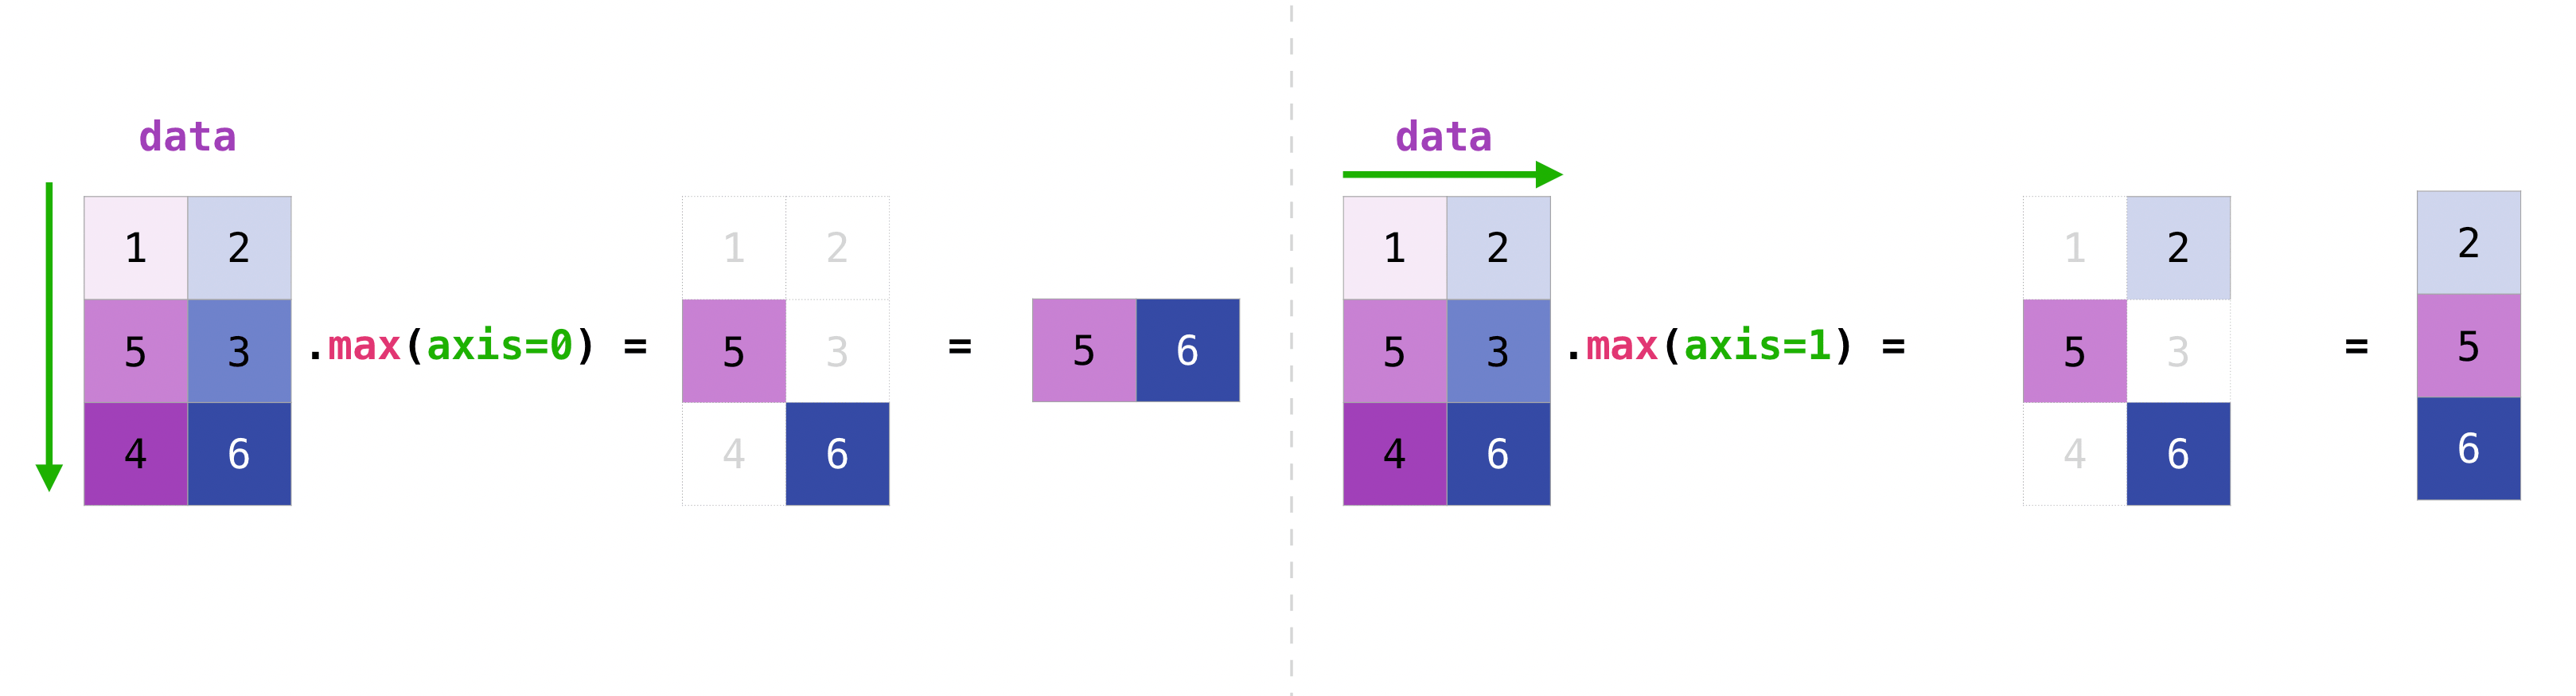

In [57]:
Image(filename='Python04-Numpy_extra/np_matrix_aggregation_row.png')

### Генерация случайных величин

* Самое важное, что нужно сделать вначале для воспроизводимости результатов - зафиксировать случайный сид с помощью `random.seed`

In [58]:
np.random.seed(seed=12345)

* Случайное, равномерное число на интервале \[0, 1\) с помощью `random.rand`

In [59]:
r_uni = np.random.rand(2, 2)
print(f'Uniform matrix = {r_uni}')

Uniform matrix = [[0.92961609 0.31637555]
 [0.18391881 0.20456028]]


* Случайное нормально распределенное значение с помощью `random.randn`

In [60]:
r_norm = np.random.randn(2, 2)
print(f'Normal matrix = {r_norm}')

Normal matrix = [[1.96578057 1.39340583]
 [0.09290788 0.28174615]]


* Случайное целое число в открытом интервале \[a, b\) с помощью `random.randint` 

In [61]:
r_int = np.random.randint(0, 10, size=(2, 2))
print(f'Integer matrix = {r_int}')

Integer matrix = [[9 7]
 [6 0]]


* Случайное перемешивание данных с помощью `random.permutation`, либо генерация случайной перестановки
* Можно также пользоваться функцией `random.shuffle`, она позволяет делать случайные перестановки по любой размерности (а не только по первой как `random.permutation`, но при этом работает inplace - то есть нужно сначала делать `copy`)

In [62]:
a_1 = np.array([1, 4, 7, 34, -5])
a_2 = np.random.permutation(a_1)
a_ind = np.random.permutation(a_1.size)
a_3 = a_1[a_ind]
print(f'a = {a_1}, Random permutation = {a_2}')
print(f'a = {a_1}, Random permutation_idx = {a_ind}, Random permutation = {a_3}')

a = [ 1  4  7 34 -5], Random permutation = [-5  1 34  4  7]
a = [ 1  4  7 34 -5], Random permutation_idx = [0 4 3 2 1], Random permutation = [ 1 -5 34  7  4]


Остальные распределения можно посмотреть на странице [документации](https://numpy.org/doc/stable/reference/random/generator.html#distributions)

### Numpy IO

* Сохранить / прочитать массивы numpy: `np.save()` / `np.load()`
* Сохранить в текстовом формате: `np.savetxt()`
* Загрузить `csv` (учитывая пропущенные значения, которые будут заменены на `nan`): `np.genfromtxt()`

In [63]:
print('b =', b)
np.save('my_b', b)
# для nix используйте: ls my_b.npy
!dir /b
q = np.load('my_b.npy')
print('q =', q)

b = [[1.5 2.  3. ]
 [4.  5.  6. ]]
.ipynb_checkpoints
my_b.npy
Python01-basics.ipynb
Python01-basics_extra
Python02-basics2.ipynb
Python02-basics2_extra
Python04-Numpy.ipynb
Python04-Numpy_extra
q = [[1.5 2.  3. ]
 [4.  5.  6. ]]


In [64]:
np.savetxt('my_b.txt', b, delimiter=',')
# для nix используйте: cat my_b.txt
!more my_b.txt

1.500000000000000000e+00,2.000000000000000000e+00,3.000000000000000000e+00
4.000000000000000000e+00,5.000000000000000000e+00,6.000000000000000000e+00


In [65]:
!echo "1.5,,3" > my_b_none.txt
!echo ",5," >> my_b_none.txt
# для nix используйте: cat my_b_none.txt
!more my_b_none.txt
w = np.genfromtxt('my_b_none.txt', delimiter=',')
print('w =', w)
print(np.isnan(w))

"1.5,,3" 
",5," 
w = [[nan nan nan]
 [nan  5. nan]]
[[ True  True  True]
 [ True False  True]]
